# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv("data/Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
employee.groupby(by= employee['Department']).mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [4]:
# Method 2
# your answer here
# salary_department = 
employee.pivot_table(index= ['Department'], values= ['Salary']).reset_index().fillna('')

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
# your answer here
employee.pivot_table(index= ['Department', 'Title'], values= ['Salary']).reset_index().fillna('')

,Department,Title,Salary
0,HR,VP,70.0
1,HR,analyst,32.5
2,IT,VP,70.0
3,IT,analyst,32.5
4,IT,associate,60.0
5,Sales,associate,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
employee.pivot_table(index=['Title'], columns= ['Years'], values= ['Salary']).reset_index().fillna('')

Title Salary                              
Years                 1     2     3     4     7     8
0             VP                                 70.0
1        analyst   35.0  30.0        35.0            
2      associate         55.0  55.0        60.0

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# your answer here
employee.pivot_table(index= ['Department', 'Title'], values = ['Salary'], aggfunc= ['count','mean'])

count   mean
                     Salary Salary
Department Title                  
HR         VP             1   70.0
           analyst        2   32.5
IT         VP             1   70.0
           analyst        2   32.5
           associate      1   60.0
Sales      associate      2   55.0

In [8]:
# or
dataset = employee.pivot_table(index= ['Department', 'Title'], values = ['Name', 'Salary'], aggfunc= {'Name':'count','Salary':'mean'})
dataset

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [31]:
# your answer here
employee.pivot_table(index= ['Department', 'Title'], values = ['Salary'], aggfunc= ['median','min','max', 'std']).fillna('')

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70          
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70          
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60          
Sales      associate   55.0     55     55       0.0

In [35]:
'''where we cannot perceive values we conclude there is no much of a difference beetwen jobtitles, probably cause is just one title(VP) or the salary is fixed for the title(associate)

for the analyst job title we can see that there is not much of a difference in salarys, that's the reason we see 3.53... as standard deviation'''

"where we cannot perceive values we conclude there is no much of a difference beetwen jobtitles, probably cause is just one title(VP) or the salary is fixed for the title(associate)\n\nfor the analyst job title we can see that there is not much of a difference in salarys, that's the reason we see 3.53... as standard deviation"

#### Based on your comments, fill the missing values with an appropriate value.

In [36]:
# your answer here
employee.pivot_table(index= ['Department', 'Title'], values = ['Salary'], aggfunc= ['median','min','max', 'std']).fillna('0.0')

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       0.0
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       0.0
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       0.0
Sales      associate   55.0     55     55       0.0

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [38]:
# your answer here
employee.pivot_table(index= ['Department'], values= ['Salary'], aggfunc=['count', 'sum'])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [40]:
# your answer here
employee.pivot_table(index= ['Department', 'Title'], values= ['Years','Salary'], aggfunc= {'Years':'sum', 'Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [13]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [44]:
# your answer here
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [43]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


<AxesSubplot:xlabel='Distance', ylabel='Calorie burned'>

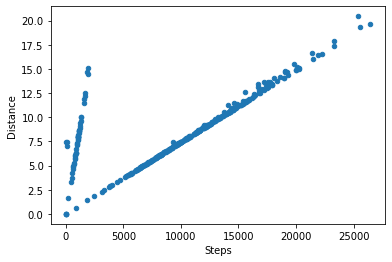

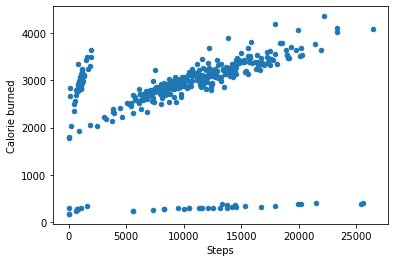

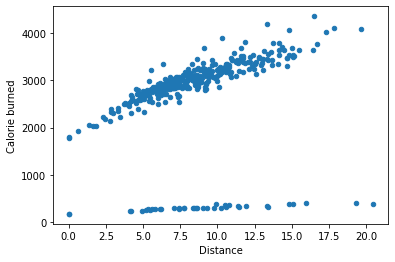

In [50]:
# your answer here
fitbit.plot.scatter(x= 'Steps', y= 'Distance')
fitbit.plot.scatter(x= 'Steps', y= 'Calorie burned')
fitbit.plot.scatter(x= 'Distance', y= 'Calorie burned')

In [46]:
fitbit.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


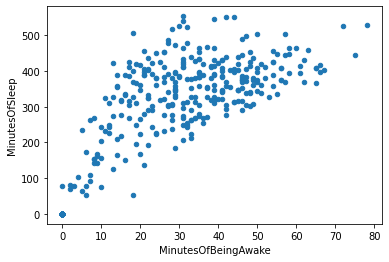

In [85]:
fitbit.plot.scatter(x= 'MinutesOfBeingAwake', y= 'MinutesOfSleep')
plt.show()

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [80]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

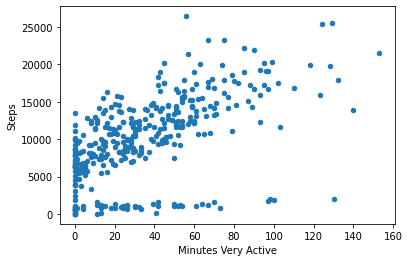

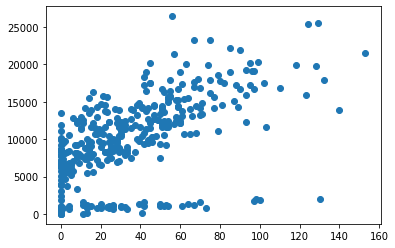

In [81]:
# your answer here
import matplotlib.pyplot as plt
fitbit.plot.scatter(x= 'Minutes Very Active', y= 'Steps')
plt.show()
plt.scatter(x= fitbit['Minutes Very Active'], y= fitbit['Steps'])
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your answer here
'''As we can see as much as we have high value of steps we see that the minutes very active are higher as well '''

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [84]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

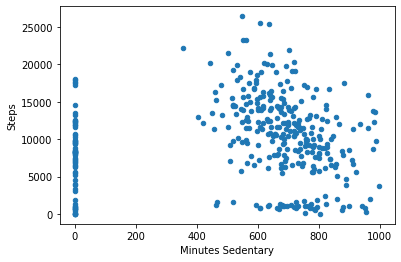

In [86]:
# your answer here
fitbit.plot.scatter(x= 'Minutes Sedentary', y= 'Steps')
plt.show()

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [87]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

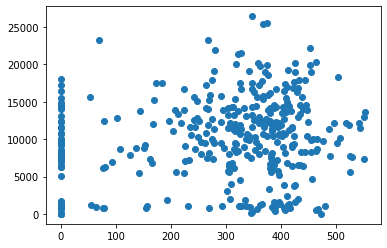

In [89]:
# your answer here
plt.scatter(x= fitbit['MinutesOfSleep'], y= fitbit['Steps'])
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [99]:
# your answer here
cor_fit = pd.DataFrame(data = fitbit, columns= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep'])
cor_fit.head()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [104]:
# your answer here
for i in cor_fit:
    print(i)
    print(cor_fit['Steps'].corr(cor_fit[i]))
    cor_fit

Calorie burned
0.2553050408017204
Steps
1.0
Floors
0.30651077257055204
Minutes Sedentary
0.07690608062990097
Minutes Very Active
0.5714518481062606
MinutesOfSleep
0.13098565950836386


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [26]:
# your answer here


#### Show visually the frequency distribution of the time_grades dataset.

In [27]:
# your answer here


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [28]:
# your answer here


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [29]:
# your answer here


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [30]:
# your answer here
